In [1]:
%load_ext autoreload
%autoreload 2

from commander.network import NetworkManager
from commander.network.protocol import (
    PingPacket,
    SetPositionPacket,
    SetVelocityPacket,
    FindLimitsPacket,
    ObservationPacket,
    RequestDebugInfoPacket,
    CheckLimitPacket,
    DoJigglePacket,
    DebugPacket,
    InfoPacket,
    ErrorPacket,
    ExperimentStartPacket,
    ExperimentStopPacket
)

from commander.network.constants import SetOperation, CartID
from time import time, sleep
import random
import numpy as np
from tqdm.notebook import trange

nm = NetworkManager(port="COM3")
nm.open()

initialised = False
while not initialised:
    try:
        nm.read_initial_output()
    except UnicodeDecodeError:
        pass
    else:
        initialised = True

nm.assert_ping_pong()

#$  Received unkown X===================
CartPole Controller
START DEBUG INFORMATION
STEPPER_CURRENT: 1000
STEPPER_MICROSTEPS: 8
STEPPER_DISTANCE_PER_ROTATION: 40.84
END DEBUG INFORMATION

Setting up I2C.
Configuring buttons.
Setting up steppers.
Starting stepper library.
Initiating astepper 1.
Setting up stepper drivers.
Setting up stepper driver 1.
CS (Vsense=1): 28
Microstepping: 32
Step delay in micros: 0
Sending 3
Received 1C3
Sending 9C7D7
Received E1
Sending A0000
Received 81
Sending C001C
Received 81
Sending E0050
Received 81
Sending E0080
Received 81
Sending C001F
Received 1CC81
Sending A8202
Received 1CC81
Sending 901B4
Received 1CC81
Sending 3
Received 1CC81
INFO: Stall Guard level reached!
INFO: Motor is standing still.
Stall Guard value:115
Sending 3
Received 1CC81
INFO: Stall Guard level reached!
INFO: Motor is standing still.
Stall Guard value:115
Microstepping: 8
Sending 5
Received 1CC81
INFO: Stall Guard level reached!
INFO: Motor is standing still.
Stall Guard value:1

In [2]:
times = []
trips = 50000  # 25000 * 0.004s ≈ 100s ≈ 1½ min]
for i in trange(trips, desc="Ping Pongs"):
    ping_pkt = PingPacket(timestamp=10)

    start_time = time()
    nm.send_packet(ping_pkt)
    pong_pkt = nm.read_packet()
    end_time = time()

    time_diff = end_time - start_time
    times.append(time_diff)

Ping Pongs:   0%|          | 0/50000 [00:00<?, ?it/s]

Freedman–Diaconis number of bins: 1345


Text(0, 0.5, 'Probability')

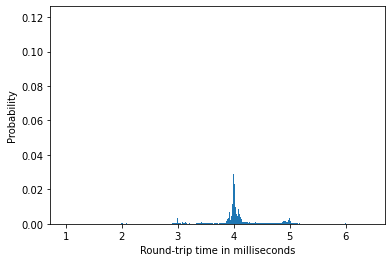

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

atimes = np.array(times)
stats.describe(atimes)

q25, q75 = np.percentile(atimes,[.25,.75])
bin_width = 2*(q75 - q25)*len(atimes)**(-1/3)
bins = round((atimes.max() - atimes.min())/bin_width)
weights = np.ones_like(atimes) / len(atimes)

print("Freedman–Diaconis number of bins:", bins)
plt.hist(atimes * 1000, weights=weights, bins = bins);
plt.xlabel("Round-trip time in milliseconds")
plt.ylabel("Probability")



In [4]:
nm.close()